In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [7]:
connection = sqlite3.connect("../db.sqlite3")

cursor=connection.cursor()
sql_query = """
SELECT  order_id, datetime, product_id, quantity, name, price
FROM restaurant_order 
JOIN restaurant_orderitem 
ON restaurant_order.id=restaurant_orderitem.order_id
JOIN restaurant_product
ON restaurant_product.id=restaurant_orderitem.product_id
"""

data_=pd.read_sql(sql_query, connection)
data_.to_csv("restaurant.csv", index=False)
cursor.close()
connection.close()
df=pd.read_csv("restaurant.csv")
df

,order_id,datetime,product_id,quantity,name,price
0,1,2019-08-03 20:25:00,6,2,Plain Papadum,0.80
1,1,2019-08-03 20:25:00,240,1,King Prawn Balti,12.95
2,1,2019-08-03 20:25:00,19,1,Garlic Naan,2.95
3,1,2019-08-03 20:25:00,36,1,Mushroom Rice,3.95
4,1,2019-08-03 20:25:00,111,1,Paneer Tikka Masala,8.95
...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,247,2,House Red wine 75cl,17.95
74814,12905,2016-05-14 19:28:00,247,2,House Red wine 75cl,17.95
74815,3272,2016-05-10 13:18:00,247,2,House Red wine 75cl,17.95
74816,11404,2016-04-07 19:04:00,248,1,House white wine 75cl,17.95


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

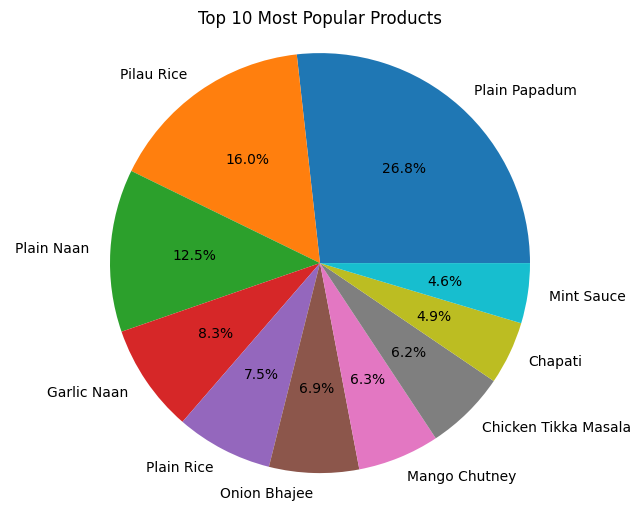

In [8]:
product_totals = df.groupby("name")["quantity"].sum()

top_products = product_totals.nlargest(10)

labels = top_products.index.tolist()
sizes = top_products.values.tolist()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Top 10 Most Popular Products")
plt.axis("equal")

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

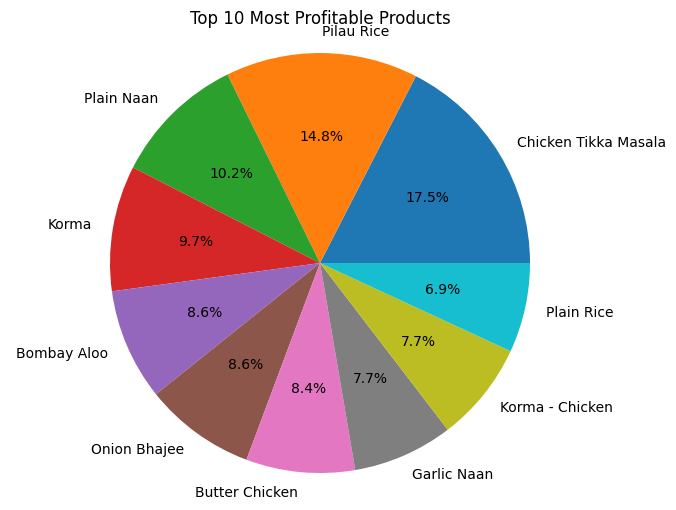

In [9]:
df["item_price"] = df["price"] * df["quantity"]

product_item_prices = df.groupby("name")["item_price"].sum()

top_products_by_price = product_item_prices.nlargest(10)

labels_price = top_products_by_price.index.tolist()
sizes_price = top_products_by_price.values.tolist()

plt.figure(figsize=(8, 6))
plt.pie(sizes_price, labels=labels_price, autopct="%1.1f%%")
plt.title("Top 10 Most Profitable Products")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

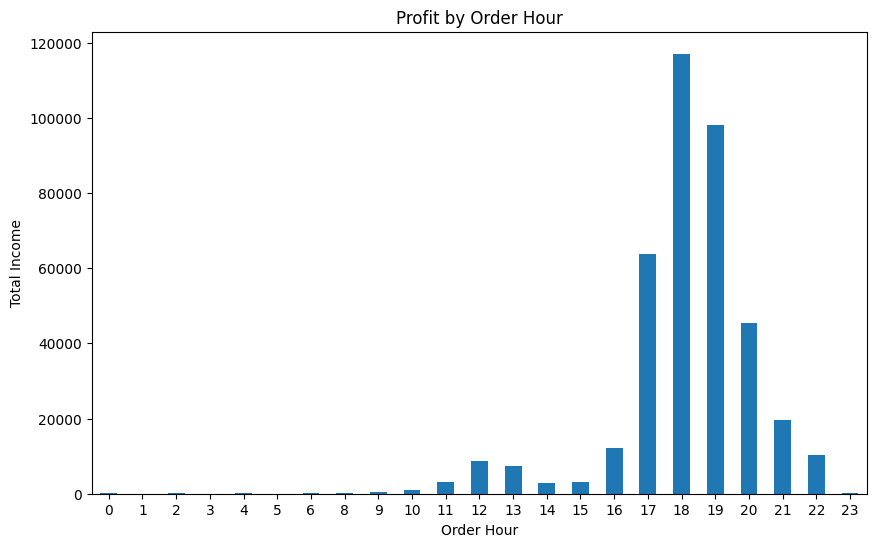

In [10]:
df["order_datetime"] = pd.to_datetime(df["datetime"])

df["order_hour"] = df["order_datetime"].dt.hour

income = df.groupby("order_hour")["price"].sum()

plt.figure(figsize=(10, 6))
income.plot(kind="bar")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Profit by Order Hour")
plt.xticks(rotation=0)

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

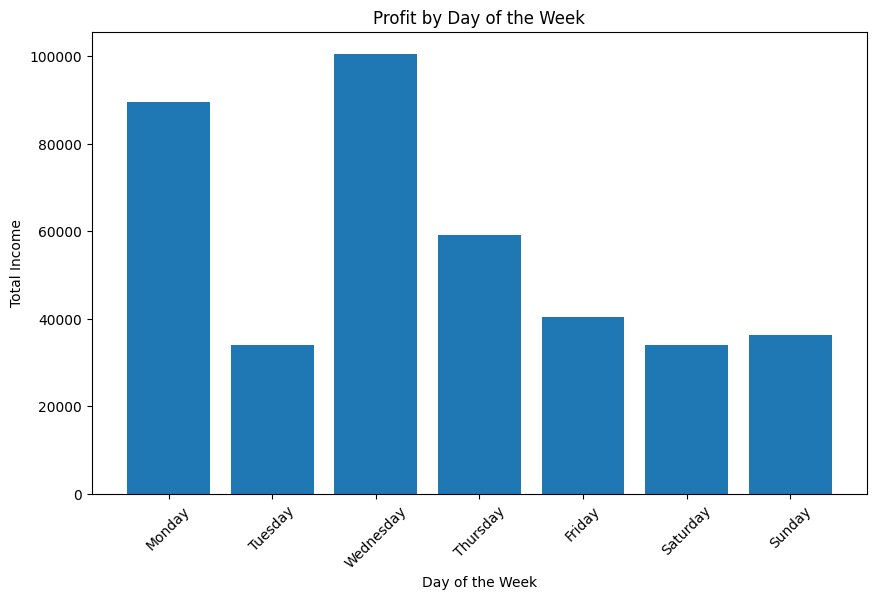

In [17]:
df["order_datetime"] = pd.to_datetime(df["order_datetime"])

df["order_day_of_week"] = df["order_datetime"].dt.dayofweek

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def map_day_of_week(day):
    return days[day]

df["order_day_name"] = df["order_day_of_week"].apply(map_day_of_week)

daily_income = df.groupby("order_day_name")["price"].sum()

plt.figure(figsize=(10, 6))
plt.bar(days, height=daily_income)
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Profit by Day of the Week")
plt.xticks(rotation=45)

plt.show()